# MMS Verification of LevelSetAdvection Kernel
This computes the forcing function for a known solution of the advection portion of the level set equation.

*Load the necessary python libraries.*

In [1]:
%matplotlib inline
import glob
from sympy import *
import pandas
init_printing()

## Define the Manufactured solution

Define the assumed (exact) solution as a fuction of x with a non-constant velocity.

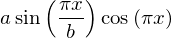

In [2]:
x,a,b= symbols('x a b')
v = 2 
u = a*cos(pi*x)*sin(pi*x/b)
u

Compute the forcing function.

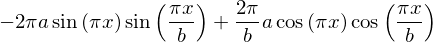

In [3]:
f = v*diff(u, x)
f

## Create ParsedFunction Strings

Build a string of the exact and forcing function to be copied to the input file (advection_mms.i). 

*The only syntax that needs to change to make this string work with MOOSE ParsedFunction is the exponent operator.*

In [4]:
str(u).replace('**', '^') 

'a*sin(pi*x/b)*cos(pi*x)'

In [5]:
str(f).replace('**', '^')

'-2*pi*a*sin(pi*x)*sin(pi*x/b) + 2*pi*a*cos(pi*x)*cos(pi*x/b)/b'

## Convergence Plot

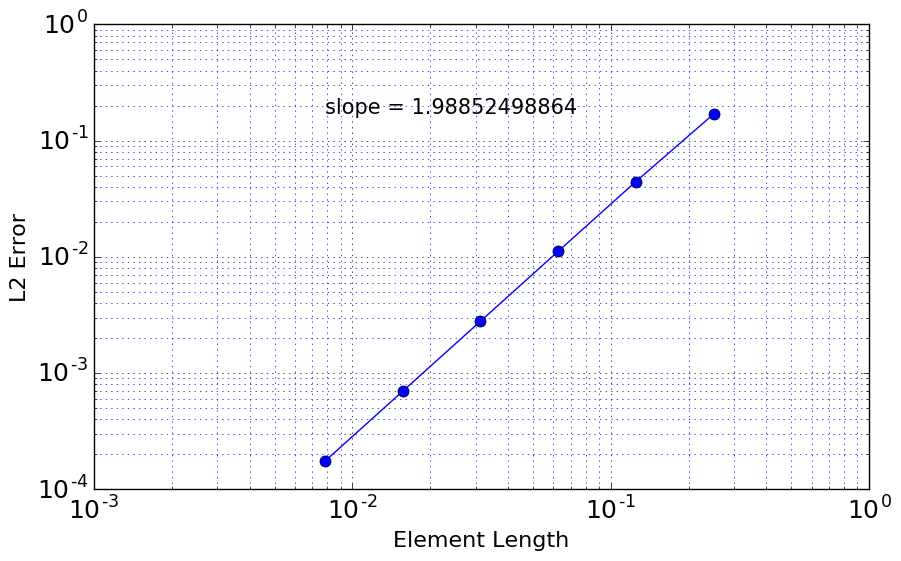

In [11]:
%run convergence.py